<a href="https://colab.research.google.com/github/RounakPython/GLabs_DS_Learn/blob/master/Visualizing_Cricket_Team_Performance_using_Matplotlib_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Dataset Analysis

## Problem Statement
We want to know as to what happens during an IPL match which raises several questions in our mind with our limited knowledge about the game called cricket on which it is based. This analysis is done to know as which factors led one of the team to win and how does it matter.

## About the Dataset :
The Indian Premier League (IPL) is a professional T20 cricket league in India contested during April-May of every year by teams representing Indian cities. It is the most-attended cricket league in the world and ranks sixth among all the sports leagues. It has teams with players from around the world and is very competitive and entertaining with a lot of close matches between teams.

The IPL and other cricket related datasets are available at [cricsheet.org](https://cricsheet.org). Feel free to visit the website and explore the data by yourself as exploring new sources of data is one of the interesting activities a data scientist gets to do.

## About the dataset:
Snapshot of the data you will be working on:<br>
<br>
The dataset 136522 data points and 23 features<br>

|Features|Description|
|-----|-----|
|match_code|Code pertaining to individual match|
|date|Date of the match played|
|city|City where the match was played|
|venue|Stadium in that city where the match was played|
|team1|team1|
|team2|team2|
|toss_winner|Who won the toss out of two teams|
|toss_decision|toss decision taken by toss winner|
|winner|Winner of that match between two teams|
|win_type|How did the team won(by wickets or runs etc.)|
|win_margin|difference with which the team won| 
|inning|inning type(1st or 2nd)|
|delivery|ball delivery|
|batting_team|current team on batting|
|batsman|current batsman on strike|
|non_striker|batsman on non-strike|
|bowler|Current bowler|
|runs|runs scored|
|extras|extra run scored|
|total|total run scored on that delivery including runs and extras|
|extras_type|extra run scored by wides or no ball or legby|
|player_out|player that got out|
|wicket_kind|How did the player got out|
|wicket_fielders|Fielder who caught out the player by catch|



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ipl = pd.read_csv('/content/ipl.csv')
ipl['year'] = ipl['date'].apply(lambda x : x[:4])
ipl.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,win_margin,inning,delivery,batting_team,batsman,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders,year
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.1,Mumbai Indians,ST Jayasuriya,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.2,Mumbai Indians,ST Jayasuriya,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN,2009
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.3,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.4,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN,2009
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.5,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN,2009


### Plot the wins gained by teams across all seasons

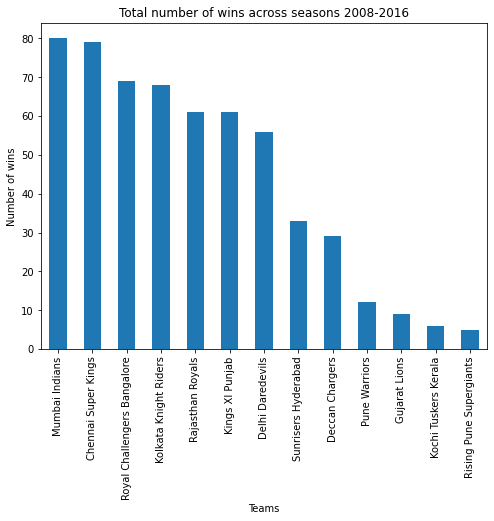

In [20]:
# Plot the wins gained by teams across all seasons
match_wise_data = ipl.drop_duplicates(subset='match_code').reset_index(drop=True)
wins_count = match_wise_data['winner'].value_counts()
wins_count.plot(kind='bar', title='Total number of wins across seasons 2008-2016', figsize=(8,6))
plt.xlabel('Teams')
plt.ylabel('Number of wins')
plt.show()

### Plot Number of matches played by each team through all seasons

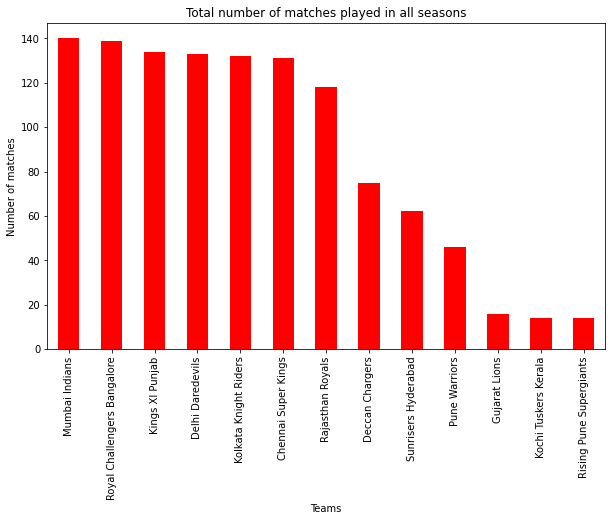

In [30]:
match_played = pd.melt(match_wise_data, id_vars=['match_code','year'], value_vars=['team1','team2'])
match_played = match_played['value'].value_counts()
match_played.plot(kind='bar', color='r', title='Total number of matches played in all seasons', figsize=(10,6))
plt.xlabel('Teams')
plt.ylabel('Number of matches')
plt.show()

### Performance of top bowlers over seasons

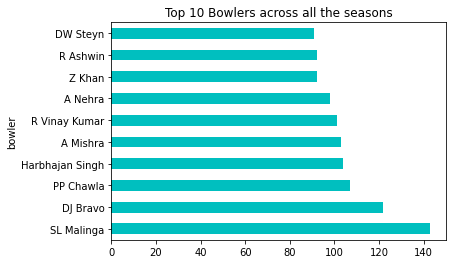

In [42]:
# Performance of top bowlers over seasons
wickets = ipl[(ipl['wicket_kind']=='bowled')|(ipl['wicket_kind']=='caught')|(ipl['wicket_kind']=='lbw')|(ipl['wicket_kind']=='caught and bowled')]
top_bowler = wickets.groupby(['bowler'])['wicket_kind'].count().sort_values(ascending=False)[:10]
top_bowler.plot(kind='barh', color='c', title='Top 10 Bowlers across all the seasons', x=top_bowler.index, y=top_bowler)
plt.show()

### How did the different pitches behave? What was the average score for each stadium?

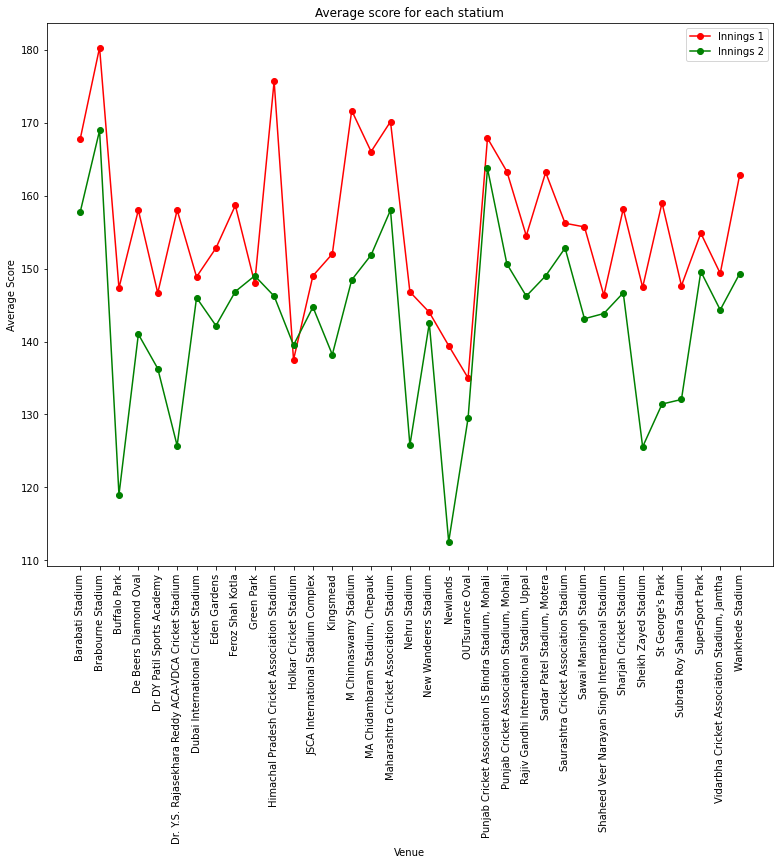

In [61]:
venue_data = ipl[['match_code', 'venue', 'inning', 'total']]
score_per_inning = venue_data.groupby(['match_code', 'venue', 'inning'])['total'].sum().reset_index()
average_scoreaverage_score_per_venue = _per_venue = score_per_inning.groupby(['venue', 'inning'])['total'].mean().reset_index()
plt.figure(figsize=(13,10))
plt.plot(average_score_per_venue[average_score_per_venue['inning']==1]['venue'], average_score_per_venue[average_score_per_venue['inning']==1]['total'], color='r', marker='o', label='Innings 1')
plt.plot(average_score_per_venue[average_score_per_venue['inning']==2]['venue'], average_score_per_venue[average_score_per_venue['inning']==2]['total'], color='g', marker='o', label='Innings 2')
plt.xlabel('Venue')
plt.ylabel('Average Score')
plt.legend()
plt.title('Average score for each statium')
plt.xticks(rotation=90)
plt.show()

### Types of Dismissal and how often they occur

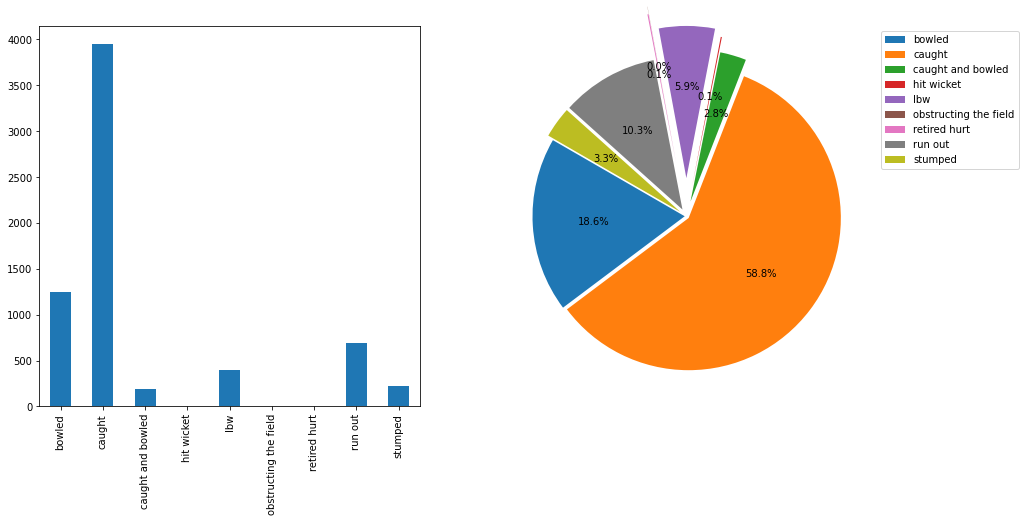

In [87]:
dismissal = ipl.groupby(['wicket_kind']).count().reset_index()
dismissal = dismissal[['wicket_kind', 'delivery']].rename(columns={'delivery':'count'})

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
dismissal.plot.bar(ax = ax1, legend=False)
ax1.set_xticklabels(list(dismissal['wicket_kind']))

explode =[0.01,0.02,0.1,0.2,0.25,0.4,0.35,0.05,0.05]
properties = ax2.pie(dismissal["count"], labels=None, startangle=150, autopct='%1.1f%%', explode=explode)
ax2.legend(bbox_to_anchor=(1,1), labels=dismissal['wicket_kind'])

plt.show()

### Plot no. of boundaries across IPL seasons

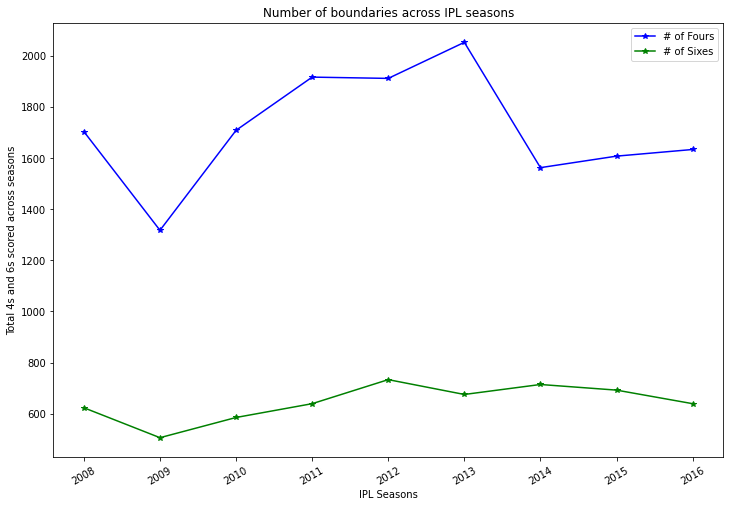

In [98]:
boundries = ipl[['runs','year']]
fours = boundries[boundries['runs']==4].groupby(['year'])['runs'].count()
sixes = boundries[boundries['runs']==6].groupby(['year'])['runs'].count()
plt.figure(figsize=(12,8))
plt.plot(fours.index, fours, color='b', marker='*', label='# of Fours')
plt.plot(sixes.index, sixes, color='g', marker='*', label='# of Sixes')
plt.xticks(rotation=30)
plt.xlabel('IPL Seasons')
plt.ylabel('Total 4s and 6s scored across seasons')
plt.title('Number of boundaries across IPL seasons')
plt.legend()
plt.show()

### What are the average statistics across all seasons?

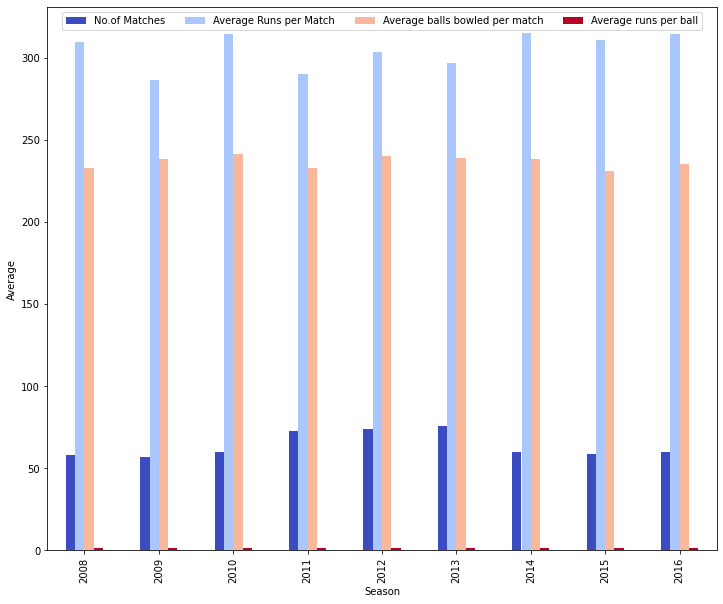

In [111]:
data_per_match = ipl.drop_duplicates(subset='match_code').reset_index()

total_runs_per_seasons = ipl.groupby(['year'])['total'].sum()
total_balls_per_seasons = ipl.groupby(['year'])['delivery'].count()
total_matches_per_seasons = data_per_match.groupby(['year'])['match_code'].count()
avg_balls_per_season = total_balls_per_seasons / total_matches_per_seasons
avg_runs_per_season = total_runs_per_seasons / total_matches_per_seasons
avg_runs_per_ball = total_runs_per_seasons / total_balls_per_seasons

avg_stats = pd.DataFrame([total_matches_per_seasons, avg_runs_per_season, avg_balls_per_season, avg_runs_per_ball])
avg_stats.index=['No.of Matches', 'Average Runs per Match', 'Average balls bowled per match', 'Average runs per ball']
#avg_stats.plot(kind='bar', stacked=False, figsize=(12,10))
avg_stats.T.plot(kind='bar', figsize = (12,10), colormap = 'coolwarm')
plt.xlabel('Season')
plt.ylabel('Average')
plt.legend(loc=9,ncol=4)
plt.show()